In [15]:
import numpy as np
import random
import hapke
import matplotlib.pyplot as plt
from scipy import optimize
import os
import shutil
from pyvims import VIMS

In [16]:
# DOWNLOAD THE CUBE AND ALLOCATE IT TO THE RIGHT FOLDER

cube_id = '1671591682_1'

directory = 'C:/Users/USUARIO/Desktop/MSc Thesis/Phase A - Data Analysis/Data/'
cube = VIMS(cube_id,root=directory)

origin = directory + cube.fname
destination = directory + cube.target_name + '/' + str(cube.flyby)

# If the folder does not exist, create it

if not os.path.exists(destination):
    os.mkdir(destination)
    print("New folder created")

if os.path.exists(destination + '/' + cube.fname):
    print("Existing Cube")
else:
    shutil.move(origin, destination)

print("Cube saved in: " + destination)


Existing Cube
Cube saved in: C:/Users/USUARIO/Desktop/MSc Thesis/Phase A - Data Analysis/Data/ENCELADUS/E13


In [17]:
T = 80
N = 20

opt_c = hapke.opticalconstants(T,sensitivity = N)
n_c = opt_c['n']
k_c = opt_c['k']
wav_c = opt_c['wav']

opt_a = hapke.opticalconstants(T, sensitivity= N,crystallinity=False)
n_a = opt_a['n']
k_a = opt_a['k']
wav_a = opt_a['wav']

int_opt = hapke.inter_optical_constants(wav_c, wav_a, n_c, k_c)

wav = np.array(int_opt['wav'])
n_c = int_opt['n']
k_c = int_opt['k']

In [18]:
pixel1 = cube@(36, 15)
e, i, phase = [np.deg2rad(pixel1.eme),np.deg2rad(pixel1.inc),np.deg2rad(pixel1.phase)]


angles = [e,i,phase]
IF1 = pixel1.spectrum
wav1 = pixel1.wvlns
ini_par = [0.5, 0.00007, 0.1]

body = cube.target_name

optimized_parameters = optimize.least_squares(
    hapke.cost_function_mixed_no_weight, ini_par, args=(wav, angles, IF1, wav1,n_c,k_c,n_a,k_a,3.2,body), bounds=([0.001,0.000001,0], [0.74,0.001,1], ),
)
optimized_values = optimized_parameters.x
print(optimized_values)
print(optimized_parameters.cost)


[1.69330346e-01 6.42753095e-05 5.02357611e-01]
0.032838584324418885


In [20]:
for i in range(5):

    optimized_parameters = optimize.least_squares(
        hapke.cost_function_mixed_no_weight, [random.random()*0.74,random.random()*0.001,random.random()], args=(wav, angles, IF1, wav1,n_c,k_c,n_a,k_a,3.2,body), bounds=([0.001,0.000001,0], [0.74,0.001,1], ),
    )
    optimized_values = optimized_parameters.x
    print([random.random()*0.74,random.random()*0.001,random.random()])
    print(optimized_values)
    print(optimized_parameters.cost)

[0.17043583658677947, 0.0006352620887437366, 0.6978588583824118]
[1.69330381e-01 6.42753231e-05 5.02357350e-01]
0.03283858432455618
[0.1685490882811684, 0.0006766324313893235, 0.589748348260762]
[1.69330363e-01 6.42753160e-05 5.02357487e-01]
0.03283858432448065
[0.5901746575220855, 0.0003074137109155781, 0.4694302156416228]
[1.69330451e-01 6.42753502e-05 5.02356879e-01]
0.03283858432491789
[0.014532493097117726, 0.00025307918326699595, 0.10077080654846526]
[1.69330451e-01 6.42753502e-05 5.02356835e-01]
0.032838584324927235
[0.1795738851592846, 0.0007708733240948342, 0.6928853842086513]
[1.69330350e-01 6.42753109e-05 5.02357589e-01]
0.032838584324431576


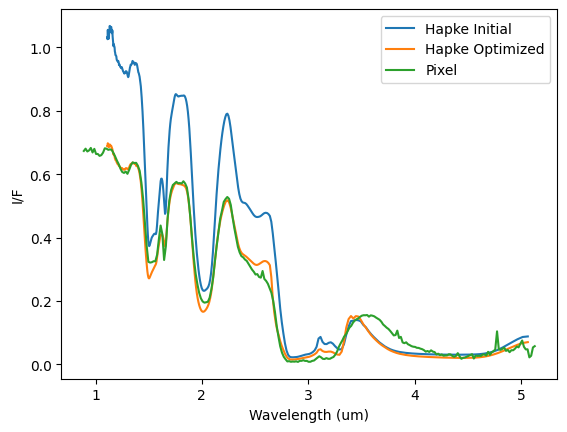

In [6]:
optimized_values = optimized_parameters.x

old_hapke = hapke.hapke_model_mixed(ini_par,wav, angles, n_c,k_c,n_a,k_a,body)['IF']

new_hapke = hapke.hapke_model_mixed(optimized_parameters.x,wav, angles, n_c,k_c,n_a,k_a,body)['IF']

fig, ax = plt.subplots()
ax.plot(wav, old_hapke, label = 'Hapke Initial')
ax.plot(wav, new_hapke, label = 'Hapke Optimized')
ax.plot(wav1, IF1, label = 'Pixel')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
optimized_values = optimized_parameters.x

# Retrieve the covariance matrix
cov_matrix = np.linalg.inv(optimized_parameters.jac.T @ optimized_parameters.jac)

# Calculate the standard errors of the optimized parameters
parameter_errors = np.sqrt(np.diag(cov_matrix))

# Print the optimized parameter values and their errors
for i, value in enumerate(optimized_values):
    print(f"Parameter {i+1}: {value:} +/- {parameter_errors[i]:.4f}")

# Calculate correlation matrix
correlation_matrix = cov_matrix / np.outer(parameter_errors, parameter_errors)

print("Correlation matrix:")
print(correlation_matrix)

In [ ]:
ini_par = [0.30, 0.00001, np.deg2rad(20), 0.3]

optimized_parameters_mixed = optimize.least_squares(
    hapke.cost_function_mixed, ini_par, args=(wav, angles, IF1, wav1,n,k,n2,k2), bounds=([0.0,0.0,0.0,0.0], [0.75,0.001,np.deg2rad(45),1.0])
)

In [ ]:
optimized_values_mixed = optimized_parameters_mixed.x

# Retrieve the covariance matrix
cov_matrix = np.linalg.inv(optimized_parameters_mixed.jac.T @ optimized_parameters_mixed.jac)

# Calculate the standard errors of the optimized parameters
parameter_errors = np.sqrt(np.diag(cov_matrix))

# Print the optimized parameter values and their errors
for i, value in enumerate(optimized_values_mixed):
    print(f"Parameter {i+1}: {value:} +/- {parameter_errors[i]:.4f}")

# Calculate correlation matrix
correlation_matrix = cov_matrix / np.outer(parameter_errors, parameter_errors)

print("Correlation matrix:")
print(correlation_matrix)

In [ ]:
optimized_values_mixed = optimized_parameters_mixed.x

old_hapke = hapke.hapke_model_mixed(ini_par,wav, angles, n,k,n2,k2)['IF']

new_hapke = hapke.hapke_model_mixed(optimized_parameters_mixed.x,wav,angles, n,k,n2,k2)['IF']

fig, ax = plt.subplots()
ax.plot(wav, old_hapke, label = 'Hapke Initial')
ax.plot(wav, new_hapke, label = 'Hapke Optimized')
ax.plot(wav1, IF1, label = 'Pixel')
ax.plot(wav1, optimized_parameters_mixed.fun, ls = '--')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

plt.imshow(cube@2.03, extent=cube.extent, cmap='gray', vmin=0, vmax=.18)

plt.colorbar(extend='max', label='I/F')

plt.scatter(36, 15, s=150)
plt.scatter(27, 30, s=150)

plt.xlabel(cube.slabel)
plt.ylabel(cube.llabel)

plt.xticks(cube.sticks)
plt.yticks(cube.lticks);

In [ ]:
pixel1 = cube@(27, 30)

i = np.deg2rad(pixel1.inc)
e = np.deg2rad(pixel1.eme)
g = np.deg2rad(pixel1.phase)

print(pixel1.inc,pixel1.eme,pixel1.phase)

IF1 = pixel1.spectrum
wav1 = pixel1.wvlns

gamma = np.arctan((np.cos(i))/(np.cos(e)*np.sin(g)) - 1 / np.tan(g))
beta = np.cos(e)/np.cos(gamma)

disk_f = np.cos(g/2)*np.cos((np.pi/(np.pi-g))*(gamma-g/2))*beta**(g/(np.pi-g))/np.cos(gamma)
albedo = IF1/(disk_f*(1-0.3651*g))



ini_par = [0.30, 0.00001, np.deg2rad(20)]

optimized_parameters = optimize.least_squares(
    cost_function, ini_par, args=(wavelength_range1, e, i, g, IF1, wav1), bounds=([0.0,0.0,0.0], [0.75,0.0001,np.deg2rad(45)])
)

In [ ]:
print(optimized_parameters)
optimized_values = optimized_parameters.x
new_hapke = hapke_model(optimized_parameters.x,wavelength_range1,e,i,g)

fig, ax = plt.subplots()
ax.plot(wavelength_range1, hapke_model(ini_par,wavelength_range1,e,i,g), label = 'Hapke Initial')
ax.plot(wavelength_range1, new_hapke, label = 'Hapke Optimized')
ax.plot(wav1, IF1, label = 'Pixel')
ax.plot(wav1, optimized_parameters.fun, ls = '--')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
optimized_values = optimized_parameters.x

# Retrieve the covariance matrix
cov_matrix = np.linalg.inv(optimized_parameters.jac.T @ optimized_parameters.jac)

# Calculate the standard errors of the optimized parameters
parameter_errors = np.sqrt(np.diag(cov_matrix))

# Print the optimized parameter values and their errors
for i, value in enumerate(optimized_values):
    print(f"Parameter {i+1}: {value:} +/- {parameter_errors[i]:.4f}")

correlation_matrix = cov_matrix / np.outer(parameter_errors, parameter_errors)

print("Correlation matrix:")
print(correlation_matrix)